In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from collections import Counter
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
%%HTML
<h3> Load Data </h3>

In [3]:
#Load data 
df = pd.read_csv('properties_2016.csv')
trainData = pd.read_csv('train_2016.csv')
zillow = pd.read_excel('zillow_data_dictionary.xlsx')

c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
%%HTML
<h3> Explore Data </h3>

In [5]:
#Explore data
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [6]:
df.shape

(2985217, 58)

In [7]:
#Explore the dtypes of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [8]:
#Notice that 'hashottuborspa' 'propertyzoningdesc' , 'propertycountylandusecode', 'fireplaceflag', 'tazdelinquencyflag' 
#are all objects.
#Should they be flaot64?
df['hashottuborspa'].unique() #has Nan or True values

array([nan, True], dtype=object)

In [9]:
#change hashottubor spa values to 0 and 1
df['hashottuborspa'].replace(True,1,inplace=True)
df['hashottuborspa'].fillna(0,inplace=True)

In [10]:
#change type of hashottuborspa
df['hashottuborspa'] = df['hashottuborspa'].astype('int64')

In [11]:
df['hashottuborspa'].unique()

array([0, 1], dtype=int64)

In [21]:
df['propertycountylandusecode'].unique() #values seem fine. This feature should be of type obejct

array(['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200',
       '010C', '0300', '1204', '100V', '01HC', '120C', '040V', '1214',
       '0101', nan, '070P', '0700', '1', '128', '0', '1112', '5050',
       '1110', '1118', '010E', '1111', '1129', '1420', '1222', '1128',
       '1310', '1117', '1333', '1116', '1410', '0104', '070D', '0108',
       '012C', '0400', '0103', '01DC', '0201', '010M', '030V', '0110',
       '010F', '010G', '010H', '0301', '0102', '020E', '020M', '0401',
       '0113', '0141', '122', '38', '135', '96', '71', '73', '34', '0209',
       '040G', '010L', '012E', '0111', '1720', '1014', '012D', '1213',
       '1201', '1321', '1444', '1421', '0140', '0123', '0133', '020G',
       '030G', '105', '0204', '010T', '0120', '1202', '121G', '010X',
       '020V', '880V', '1120', '0130', '0118', '01HE', '120G', '5060',
       '0131', '0203', '011C', '1215', '1212', '040D', '120T', '0420',
       '8', '1203', '070X', '0114', '030E', '121T', '1012', '121C',
       '

In [22]:
df['propertyzoningdesc'].unique() #has NAN and "..." values which should be replaces


array([nan, 'LCA11*', 'LAC2', ..., 'WCR1400000', 'EMPYYY', 'RMM2*'],
      dtype=object)

In [23]:
df['fireplaceflag'].unique() #has Nan and True values. Must change Nan to false

array([0, 1], dtype=int64)

In [24]:
df['fireplaceflag'].replace(True,1,inplace=True)
df['fireplaceflag'].fillna(0,inplace=True)

In [25]:
#change dtype of fireplace flag
df['fireplaceflag']= df['fireplaceflag'].astype('int64')

In [26]:
df['taxdelinquencyflag'].unique() #has Nan and 'Y'. replace Nan with False or 0 and Y with true or1

array([0., 1.])

In [27]:
df['taxdelinquencyflag'].replace('Y', 1, inplace=True)


In [28]:
df['taxdelinquencyflag'].fillna(0,inplace=True)

In [29]:
#check if correctly changed
df['taxdelinquencyflag'].unique()

array([0., 1.])

In [30]:
#change feature type to int64
df['taxdelinquencyflag'] =df['taxdelinquencyflag'].astype('int64')

In [31]:
df['architecturalstyletypeid'].unique()

array([nan,  7., 21.,  8.,  2.,  3.,  5., 10., 27.])

In [32]:
#check to see if all types were changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [33]:
%%HTML
<h3> Find missing values </h3>

In [34]:
#Many NaN values in the features
#Determine number of missing values for each feature
# total rows is 2985217
#feature 'storytypeid' has the most Nan values
df.isna().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                        0
heatingorsystemtypeid           1178816
latitude                          11437


In [35]:
#find percentage of mising values for each feature
# 2173698/ 
percentmissing = pd.DataFrame((df.isna().sum()/2985217)*100, columns=['PercentMissing'])

In [36]:
#This is the percent of missing values for each feature
#any feature with >=90% missing values can be droped

percentmissing.sort_values(by='PercentMissing',ascending=False)

,PercentMissing
storytypeid,99.945599
basementsqft,99.945465
yardbuildingsqft26,99.911330
architecturalstyletypeid,99.796966
typeconstructiontypeid,99.773986
finishedsquarefeet13,99.743000
buildingclasstypeid,99.576949
decktypeid,99.427311
finishedsquarefeet6,99.263002
poolsizesum,99.063385


In [37]:
#define featuresToDrop
featuresToDrop = percentmissing[percentmissing['PercentMissing'] >=90].index

In [38]:
#How many features are being dropped?
len(featuresToDrop)

17

In [39]:
df.drop(featuresToDrop,axis=1,inplace=True)

In [40]:
#df now has 41 feautres down from 58
df.shape

(2985217, 41)

In [41]:
#Check parcelid 
df['parcelid'].unique()

array([ 10754147,  10759547,  10843547, ..., 168040630, 168040830,
       168040430], dtype=int64)

In [42]:
#Deal with remaining Nan values
percentmissing = pd.DataFrame((df.isna().sum()/2985217)*100, columns=['PercentMissing'])

In [43]:
%%HTML
<h3> Address remaining Nan values </h3>

In [44]:
percentmissing.sort_values(by='PercentMissing',ascending=False)

,PercentMissing
threequarterbathnbr,89.560859
fireplacecnt,89.527160
pooltypeid7,83.737899
poolcnt,82.663438
numberofstories,77.151778
airconditioningtypeid,72.815410
garagecarcnt,70.411967
garagetotalsqft,70.411967
regionidneighborhood,61.262381
heatingorsystemtypeid,39.488453


In [45]:
#for threequarterbathnbr the Nans are most likely 0
#fill nans to 0?
#This feature may have too many nans to be useful. Feature nearly dorpped
df['threequarterbathnbr'].unique()
df['threequarterbathnbr'].fillna(0,inplace=True)

In [46]:
#double check
df['threequarterbathnbr'].unique()

array([0., 1., 2., 4., 3., 6., 5., 7.])

In [47]:
#change poolcnt nan to 0
df['poolcnt'].unique()

array([nan,  1.])

In [48]:
#fill na with 0
df['poolcnt'].fillna(0,inplace=True)

In [49]:
#double check
df['poolcnt'].unique()

array([0., 1.])

In [50]:
#change nans to 0
df['pooltypeid7'].unique()


array([nan,  1.])

In [51]:
df['pooltypeid7'].fillna(0,inplace=True)

In [52]:
#change firplacecnt nans to zero
#Are nans really 0 here?
df['fireplacecnt'].unique()

array([nan,  3.,  1.,  2.,  4.,  9.,  5.,  7.,  6.,  8.])

In [53]:
df['fireplacecnt'].fillna(0,inplace=True)

In [54]:
df['fireplacecnt'].unique()

array([0., 3., 1., 2., 4., 9., 5., 7., 6., 8.])

In [55]:
#change nan to average 
df['numberofstories'].unique()

array([nan,  1.,  4.,  2.,  3., 41.,  5.,  6., 20.,  7., 14., 17.,  8.])

In [56]:
#What is the mode number of floors.Take than and round
df['numberofstories'].mode()[0]

1.0

In [57]:
df['numberofstories'].fillna(df['numberofstories'].mode()[0],inplace = True)

In [58]:
#double check
df['numberofstories'].unique()

array([ 1.,  4.,  2.,  3., 41.,  5.,  6., 20.,  7., 14., 17.,  8.])

In [59]:
#replace nan with most common ACtype id
df['airconditioningtypeid'].unique()

array([nan,  1., 13.,  5., 11.,  9., 12.,  3.])

In [60]:
df['airconditioningtypeid'].mode()[0]

1.0

In [61]:
df['airconditioningtypeid'].fillna(df['airconditioningtypeid'].mode()[0], inplace=True)

In [62]:
#double check
df['airconditioningtypeid'].unique()

array([ 1., 13.,  5., 11.,  9., 12.,  3.])

In [63]:
#change nans to most common garage carcount
df['garagecarcnt'].unique()

array([nan,  2.,  4.,  1.,  3.,  0.,  5.,  7.,  6.,  8.,  9., 12., 11.,
       10., 13., 14., 15., 25., 21., 18., 17., 24., 19., 16., 20.])

In [64]:
df['garagecarcnt'].fillna(df['garagecarcnt'].mode()[0],inplace=True)

In [65]:
#double check
df['garagecarcnt'].unique()

array([ 2.,  4.,  1.,  3.,  0.,  5.,  7.,  6.,  8.,  9., 12., 11., 10.,
       13., 14., 15., 25., 21., 18., 17., 24., 19., 16., 20.])

In [66]:
#change nans to most common gargesqsize
df['garagetotalsqft'].unique()

array([  nan,  420.,  525., ..., 2482., 4568., 1974.])

In [67]:
df['garagetotalsqft'].fillna(df['garagetotalsqft'].mode()[0],inplace=True)

In [68]:
#Check for change 
df['garagetotalsqft'].unique()

array([   0.,  420.,  525., ..., 2482., 4568., 1974.])

In [69]:
#fill nans of propertyzoningdesc
df['propertyzoningdesc'].unique()

array([nan, 'LCA11*', 'LAC2', ..., 'WCR1400000', 'EMPYYY', 'RMM2*'],
      dtype=object)

In [70]:
#fill nans of unitcnt with mode

df['unitcnt'].unique()
df['unitcnt'].fillna(df['unitcnt'].mode()[0],inplace=True)


In [71]:
#double check
df['unitcnt'].unique()

array([  1.,   2.,   3.,   5.,   4.,   9.,  48.,  13.,  22.,  26.,  73.,
        16.,  12.,   6.,   7.,  29.,  35., 127.,  18.,   8.,  10., 199.,
        11.,  77.,  69.,  21., 138.,  33.,  36.,  14., 196., 214.,  51.,
        30.,  20., 211., 421.,  27.,  90.,  28.,  80.,  24.,  32., 131.,
       238., 883.,  75.,  74., 120.,  37.,  19.,  17., 143., 464.,  98.,
        42.,  52.,  65.,  23.,  25., 951.,  15., 100.,  58., 865., 111.,
        41.,  38., 679., 144.,  78.,  39., 237.,  45.,  44., 151., 156.,
        50.,  70.,  31.,  63., 125., 132.,  43.,  72., 134., 101., 693.,
       623.,  49.,  40., 614., 112., 186.,  54., 206.,  66., 685.,  55.,
        96.,  59.,  56., 232.,  34., 149.,  87.,  60., 386.,  46., 113.,
       376., 252., 256.,  68., 502., 279., 303., 114., 401., 105., 524.,
       383.,  79.,  85.,  93.,  53.,  84., 888.,  83., 997.,  91.,  76.,
       181.,  97.,  62., 583., 246., 102., 708., 179., 332., 224., 118.,
        61.,  88., 130.])

In [72]:
#replace nans with mode 
#alternatively do knn with long and latitude to find nans
df['buildingqualitytypeid'].unique()
df['buildingqualitytypeid'].fillna(df['buildingqualitytypeid'].mode()[0],inplace=True)

In [73]:
#double check
df['buildingqualitytypeid'].unique()

array([ 7.,  4., 10.,  1., 12.,  8.,  3.,  6.,  9.,  5., 11.,  2.])

In [74]:
#change nans to mode
df['heatingorsystemtypeid'].unique()
df['heatingorsystemtypeid'].fillna(df['heatingorsystemtypeid'].mode()[0], inplace=True)

In [75]:
#double check
df['heatingorsystemtypeid'].unique()

array([ 2.,  7., 20.,  6., 13., 18., 24., 12., 10.,  1., 14., 21., 11.,
       19.])

In [76]:
#How to fill in missing reaion id neightborhood?
#could fill in missing values by plotting longitutde and latitude and doing knn
#this might be a bit of work
df['regionidneighborhood'].unique()

array([    nan,  27080.,  46795., 274049.,  31817.,  37739., 115729.,
         7877., 762191.,  13327., 116415., 113910., 117023., 761543.,
       403142., 118920., 118208., 403192., 274514., 268496., 268118.,
       268404., 116206., 114914., 403190., 113886., 268134., 268473.,
       273825., 115609.,  32059., 274359., 275856., 276256., 275958.,
       275405., 273539., 273930., 276476., 416304., 416309., 273486.,
        54300., 118825., 762685.,  40548.,  41466.,  34213., 268249.,
        40215., 116646.,  37835.,  30731.,  33183.,  26134., 764167.,
       343505., 275989., 275428.,  38888.,  48516., 416329., 259606.,
       763090., 276581., 276486., 403197., 403196., 268441., 118872.,
       275795., 762933.,  46736., 761219., 761223., 761218., 761211.,
       116430., 761055., 761221., 411433., 761210.,  22655., 116692.,
       135143., 762926., 762959.,  30685., 762961., 762956., 761001.,
       762951., 762930., 117148., 762962., 762940., 762957., 762949.,
       118106., 7629

In [77]:
#check percentage of missing values after filling nans
percentmissing = pd.DataFrame((df.isna().sum()/2985217)*100, columns=['PercentMissing'])
percentmissing.sort_values(by='PercentMissing',ascending=False)

,PercentMissing
regionidneighborhood,61.262381
propertyzoningdesc,33.719090
lotsizesquarefeet,9.248875
finishedsquarefeet12,9.246664
calculatedbathnbr,4.318346
fullbathcnt,4.318346
censustractandblock,2.516601
landtaxvaluedollarcnt,2.268947
regionidcity,2.105207
yearbuilt,2.007492


In [78]:
featureswithnan = percentmissing[percentmissing['PercentMissing']>0].index


In [79]:
# we still have several features with missing values
#Replace remaining nans with mode
#we will drop regionidbeighborhood and quickly replace 


In [80]:
for i in featureswithnan:
    df[i].fillna(df[i].mode()[0],inplace =True)

In [81]:
#df.drop('regionidneighborhood',axis=1, inplace=True)

In [82]:
%%HTML
<h3> Handle categorical features </h3>

In [83]:
#must labelencode the propertycountylandusecode and propertyxoning desc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 41 columns):
parcelid                        int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  int64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
pooltypeid7                     float64
propertycountylandusecode       object
propertylandusetypeid           float64
propertyzoni

In [84]:
#remove nans from propertycountylandusecode
df['propertycountylandusecode'].fillna(0,inplace=True)


In [85]:
#Label encode propertycountylandusecode
labelencoder = LabelEncoder()
df['propertycountylandusecode'] = labelencoder.fit_transform(df['propertycountylandusecode'].astype('str'))

In [86]:
#labelencode propertyzoningdesc
df['propertyzoningdesc'] = labelencoder.fit_transform(df['propertyzoningdesc'].astype('str'))

In [87]:
%%HTML
<h3> Feature Engineering </h3>

In [88]:
%%HTML
<h3> Answering Quesions </h3>

In [89]:
%%HTML
<h3> Which parcelid has the greates number of missing features? </h3>

In [90]:
%%HTML
<h3> Determine the number of cities in each county </h3>

In [91]:
#how many cities in each county?
#there are 3 regionidcounty values which means 3 counties
#there are 405 unique zip codes some of which may be within the same city
#there are 186 unique city ids 
#there are X unique neighborhood ids




In [92]:
#group the df by regionidcounty and then by region idcity
citiesPerCounty = df.groupby(by='regionidcounty')['regionidcity'].count()

In [93]:
#the following df shows how many cities are in each county
citiesPerCounty

regionidcounty
1286.0     741565
2061.0     222853
3101.0    2020799
Name: regionidcity, dtype: int64

In [94]:
%%HTML
<h3> Which columns containing the names "id" can be eliminated? </h3>

In [119]:
'''
The following columns with the name "id" can be eliminated:

regionidneighborhood - Has over 60% mising values and values that are a mix of stirngs and intgers so no mean can be taken
regionidzip - Has low correlation of 0.019664 relative to parcelID and does not provide significant additional info about housing price of logerror.
    The information captured here is maybe redundant relative to the info provided to us by regionidcounty, for example
propertylandusetypeid - Has low correlation of 0.014994 to parcelID. Has significant negative correlation to calculatedfinishedsqaurefeet. Since we're looking at 
    housing data all landusetypes should be similar.
pooltypeid7 - had 83.7 percent missing values to start. The values of this feature seem to represent having a pool or not. Nans were imputed to 0 and since
    83.7 percent of houses don't have the pool we can consider this extraneous information
airconditioningtypeid - Had 72.8 percent missing values to start. This feature seems to be expressing different types of AC units. 
    The feature could be reduced to having or not having AC. Nans were imputed with most common AC type, however they could also be imputed with 0 menaing that they don't have AC.
    It's unclear how the imputation should be handled and therfore it should be dropped.
buildingclasstypeid - Has 99.5 percent missing values to start. Too many missing values to impute well. Not enough is known about the buildings in question for this feature
    to be useful as 99.5 percent of values are NANs
decktypeid - Has 99.4 percent missing values. Too many missing values to impute well. 
storytypeid - Has 99.9 percent missing values. Too many missing values to impute correctly. Provided no additinonal information
architecturalstyletypeid - Has 99.7 percent missing values. Too many missing values to impute correctly. Does not provide any addtional information
typeconstructiontypeid -  has 99.7 percent missing values. Too many missing values to impute well. Does not provide additional info
pooltypeid2 - Hs 98.9 percent missing values. Provides redundant information. Is basically the same as pooltypeid10
pooltypeid10 - has 98.2 missing values to start. Provides redudant information.
heatingorsystemtypeid - Had 39.8 missing values to start. Nans were imputed with most common heating system. Provides little informaiton. Could be reduced to Hasheatingsystem.




'''

'\nThe following columns with the name "id" can be eliminated:\n\nregionidneighborhood - Has over 60% mising values and values that are a mix of stirngs and intgers so no mean can be taken\nregionidzip - Has low correlation of 0.019664 relative to parcelID and does not provide significant additional info about housing price of logerror.\n    The information captured here is maybe redundant relative to the info provided to us by regionidcounty, for example\npropertylandusetypeid - Has low correlation of 0.014994 to parcelID. Has significant negative correlation to calculatedfinishedsqaurefeet. Since we\'re looking at \n    housing data all landusetypes should be similar.\npooltypeid7 - had 83.7 percent missing values to start. The values of this feature seem to represent having a pool or not. Nans were imputed to 0 and since\n    83.7 percent of houses don\'t have the pool we can consider this extraneous information\nairconditioningtypeid - Had 72.8 percent missing values to start. This

In [95]:
#remove the aboce features
idfeatures = ['heatingorsystemtypeid','airconditioningtypeid','propertylandusetypeid','regionidzip','regionidneighborhood']
df.drop(idfeatures,axis =1, inplace=True)

In [96]:
%%HTML
<h3> Determing which county has the highest and lowest logerror in each city? </h3>

In [97]:
#Make new df containing the logerrors from trainingset
#dflogerror = df.merge(trainData,how='left',on="parcelid")
dflogerror = df.merge(trainData,on="parcelid")

In [125]:
#drop transaction date
dflogerror.drop(['transactiondate'],axis=1,inplace=True)

In [98]:
dflogerror.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,0.0,2.0,...,0,115087.0,191811.0,2015.0,76724.0,2015.06,0,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,0.0,1.0,...,0,143809.0,239679.0,2015.0,95870.0,2581.30,0,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,0.0,2.0,...,0,33619.0,47853.0,2015.0,14234.0,591.64,0,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,1.0,...,0,45609.0,62914.0,2015.0,17305.0,682.78,0,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,1.0,2.0,...,0,277000.0,554000.0,2015.0,277000.0,5886.92,0,6.111001e+13,0.0573,2016-08-08


In [99]:
#make a groupby object grouped by county and city. Apply max funciton
countylogerrormax = dflogerror.groupby(by=['regionidcounty','regionidcity']).apply(max)

In [100]:
#make groupby objecte grouped by county and city and apply min funciton
countylogerrormin = dflogerror.groupby(by=["regionidcounty",'regionidcity']).apply(min)

In [101]:
#find the highes logerror. it is 4.737
countylogerrormax['logerror'].max()

4.737

In [102]:
#find lowest log error. it is -4.605
countylogerrormin['logerror'].min()

-4.605

In [103]:
#The county with regionidcounty 3101 has the highes logerror of 4.737 in regionidcity of 12447
countylogerrormax[countylogerrormax['logerror'] ==4.737]

,,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror,transactiondate
regionidcounty,regionidcity,,,,,,,,,,,,,,,,,,,,,
3101.0,12447.0,13081688,20.0,16.0,12.0,20.0,22741.0,20013.0,6037.0,0.0,20.0,...,1,7838271.0,25605020.0,2015.0,17766749.0,311064.07,1,6.059076e+13,4.737,2016-12-30


In [104]:
#There are two counties and cities with the loweest logerror. 
countylogerrormin[countylogerrormin['logerror']==-4.605]

,,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror,transactiondate
regionidcounty,regionidcity,,,,,,,,,,,,,,,,,,,,,
2061.0,27110.0,17220887,0.0,0.0,7.0,1.0,400.0,400.0,6111.0,0.0,1.0,...,0,14123.0,39669.0,2015.0,9766.0,424.30,0,6.037920e+13,-4.605,2016-01-04
3101.0,118225.0,12726360,1.0,1.0,4.0,1.0,702.0,702.0,6037.0,0.0,1.0,...,0,15034.0,42790.0,2015.0,16088.0,854.91,0,6.037502e+13,-4.605,2016-01-04


In [105]:
%%HTML
<h3> Determine the correlation between the size and room number </h3>

In [106]:
#determine the correlation between size and room number
#calculatedfinishedsquarefeet and roomcnt
sizeandroom = df.corr()
sizeandroom.sort_values(by='roomcnt', ascending=False)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
roomcnt,0.120113,0.062964,0.162923,0.261020,0.029206,0.038248,0.118166,0.688829,0.620112,-0.021698,...,0.130155,0.578403,0.057863,-0.014305,0.006992,0.004261,0.021691,-0.018496,-0.042296,0.429722
garagetotalsqft,0.105617,0.180304,0.214201,0.259775,0.158251,0.119663,0.281787,0.593997,0.525256,0.091776,...,0.238764,0.412829,0.021829,0.073564,0.101366,0.006541,0.096928,0.069586,-0.043754,0.369617
propertycountylandusecode,0.124565,-0.004008,-0.019054,0.360735,0.062249,0.055865,0.049035,0.672967,0.387397,-0.010766,...,0.265467,0.402510,0.068108,0.006547,0.022222,0.001417,0.031919,-0.003044,-0.049566,0.413164
fips,0.173472,-0.018843,-0.011750,0.274043,0.014966,0.014393,0.072515,1.000000,0.582463,-0.043156,...,0.246085,0.408362,0.022685,0.012819,0.001497,0.003143,-0.008673,-0.022803,-0.047185,0.613254
rawcensustractandblock,0.222425,-0.019552,-0.011753,0.274546,0.013925,0.013454,0.071193,0.997715,0.581155,-0.043704,...,0.245617,0.406239,0.022169,0.012171,-0.001209,0.003184,-0.011386,-0.025197,-0.047582,0.611979
fireplacecnt,0.099190,0.099672,0.121204,0.159052,0.088536,0.069892,0.165169,0.582463,1.000000,0.049438,...,0.146794,0.412714,-0.013139,0.034185,0.041583,0.002490,0.035613,0.018763,-0.030035,0.363836
numberofstories,0.072313,0.082946,0.083517,0.149977,0.093577,0.077981,0.143714,0.408362,0.412714,0.034996,...,0.140325,1.000000,0.062744,0.018097,0.035008,0.002267,0.039460,0.017370,-0.026053,0.254576
censustractandblock,0.105846,-0.005904,0.000835,0.167828,0.009599,0.009065,0.045469,0.613254,0.363836,-0.026328,...,0.152569,0.254576,0.014103,0.007782,0.001195,0.004683,-0.005307,-0.014028,-0.029058,1.000000
threequarterbathnbr,0.070455,0.154843,0.079298,0.170735,0.142891,0.076732,0.181467,0.363642,0.249634,-0.015900,...,0.280576,0.371529,0.043673,0.070480,0.089830,0.004470,0.081741,0.069535,-0.029013,0.224806
buildingqualitytypeid,0.096508,-0.220149,-0.063363,1.000000,-0.202569,-0.053789,-0.135702,0.274043,0.159052,-0.232004,...,-0.224893,0.149977,0.020973,-0.037928,-0.022810,-0.007388,-0.000566,-0.031823,0.001702,0.167828


In [107]:
s = sizeandroom.groupby('roomcnt')['calculatedfinishedsquarefeet']

In [ ]:
for key, item in s:
    print(s.get_group(key))


In [117]:
'''
The correlation between roomcnt and calculatedfinishedsquarefeet 
is 0.038248

The correlation between bathroomcnt and calculatedfinishedsquarefeet
is 0.346913

The correlation between bedroomcnt and calculatedfinishedsquarefeet 
is 0.257221

Overall, the correlation between roomcnt and calculatedfinishedsquarefeet is
slightly positively correlated
'''


'\nThe correlation between roomcnt and calculatedfinishedsquarefeet \nis 0.038248\n\nThe correlation between bathroomcnt and calculatedfinishedsquarefeet\nis 0.346913\n\nThe correlation between bedroomcnt and calculatedfinishedsquarefeet \nis 0.257221\n\nOverall, the correlation between roomcnt and calculatedfinishedsquarefeet is\nslightly positively correlated\n'

In [86]:
%%HTML
<h3> Plot features </h3>

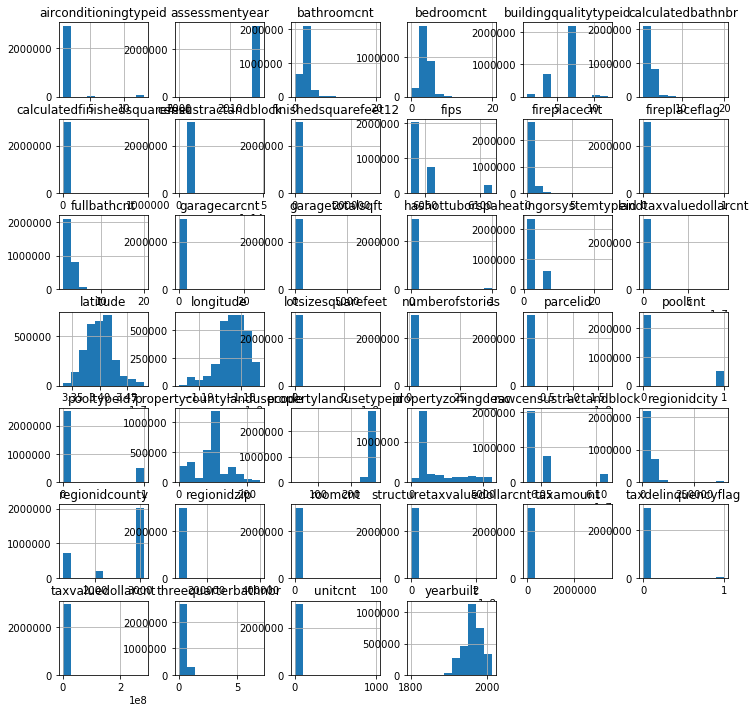

In [87]:
#plot feature distribution
#the latitude and loginture are normally distributed

df.hist(figsize=(12,12))
plt.show()

In [ ]:
#pd.plotting.scatter_matrix(df)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001D81FF8C310> (for post_execute):


KeyboardInterrupt: 

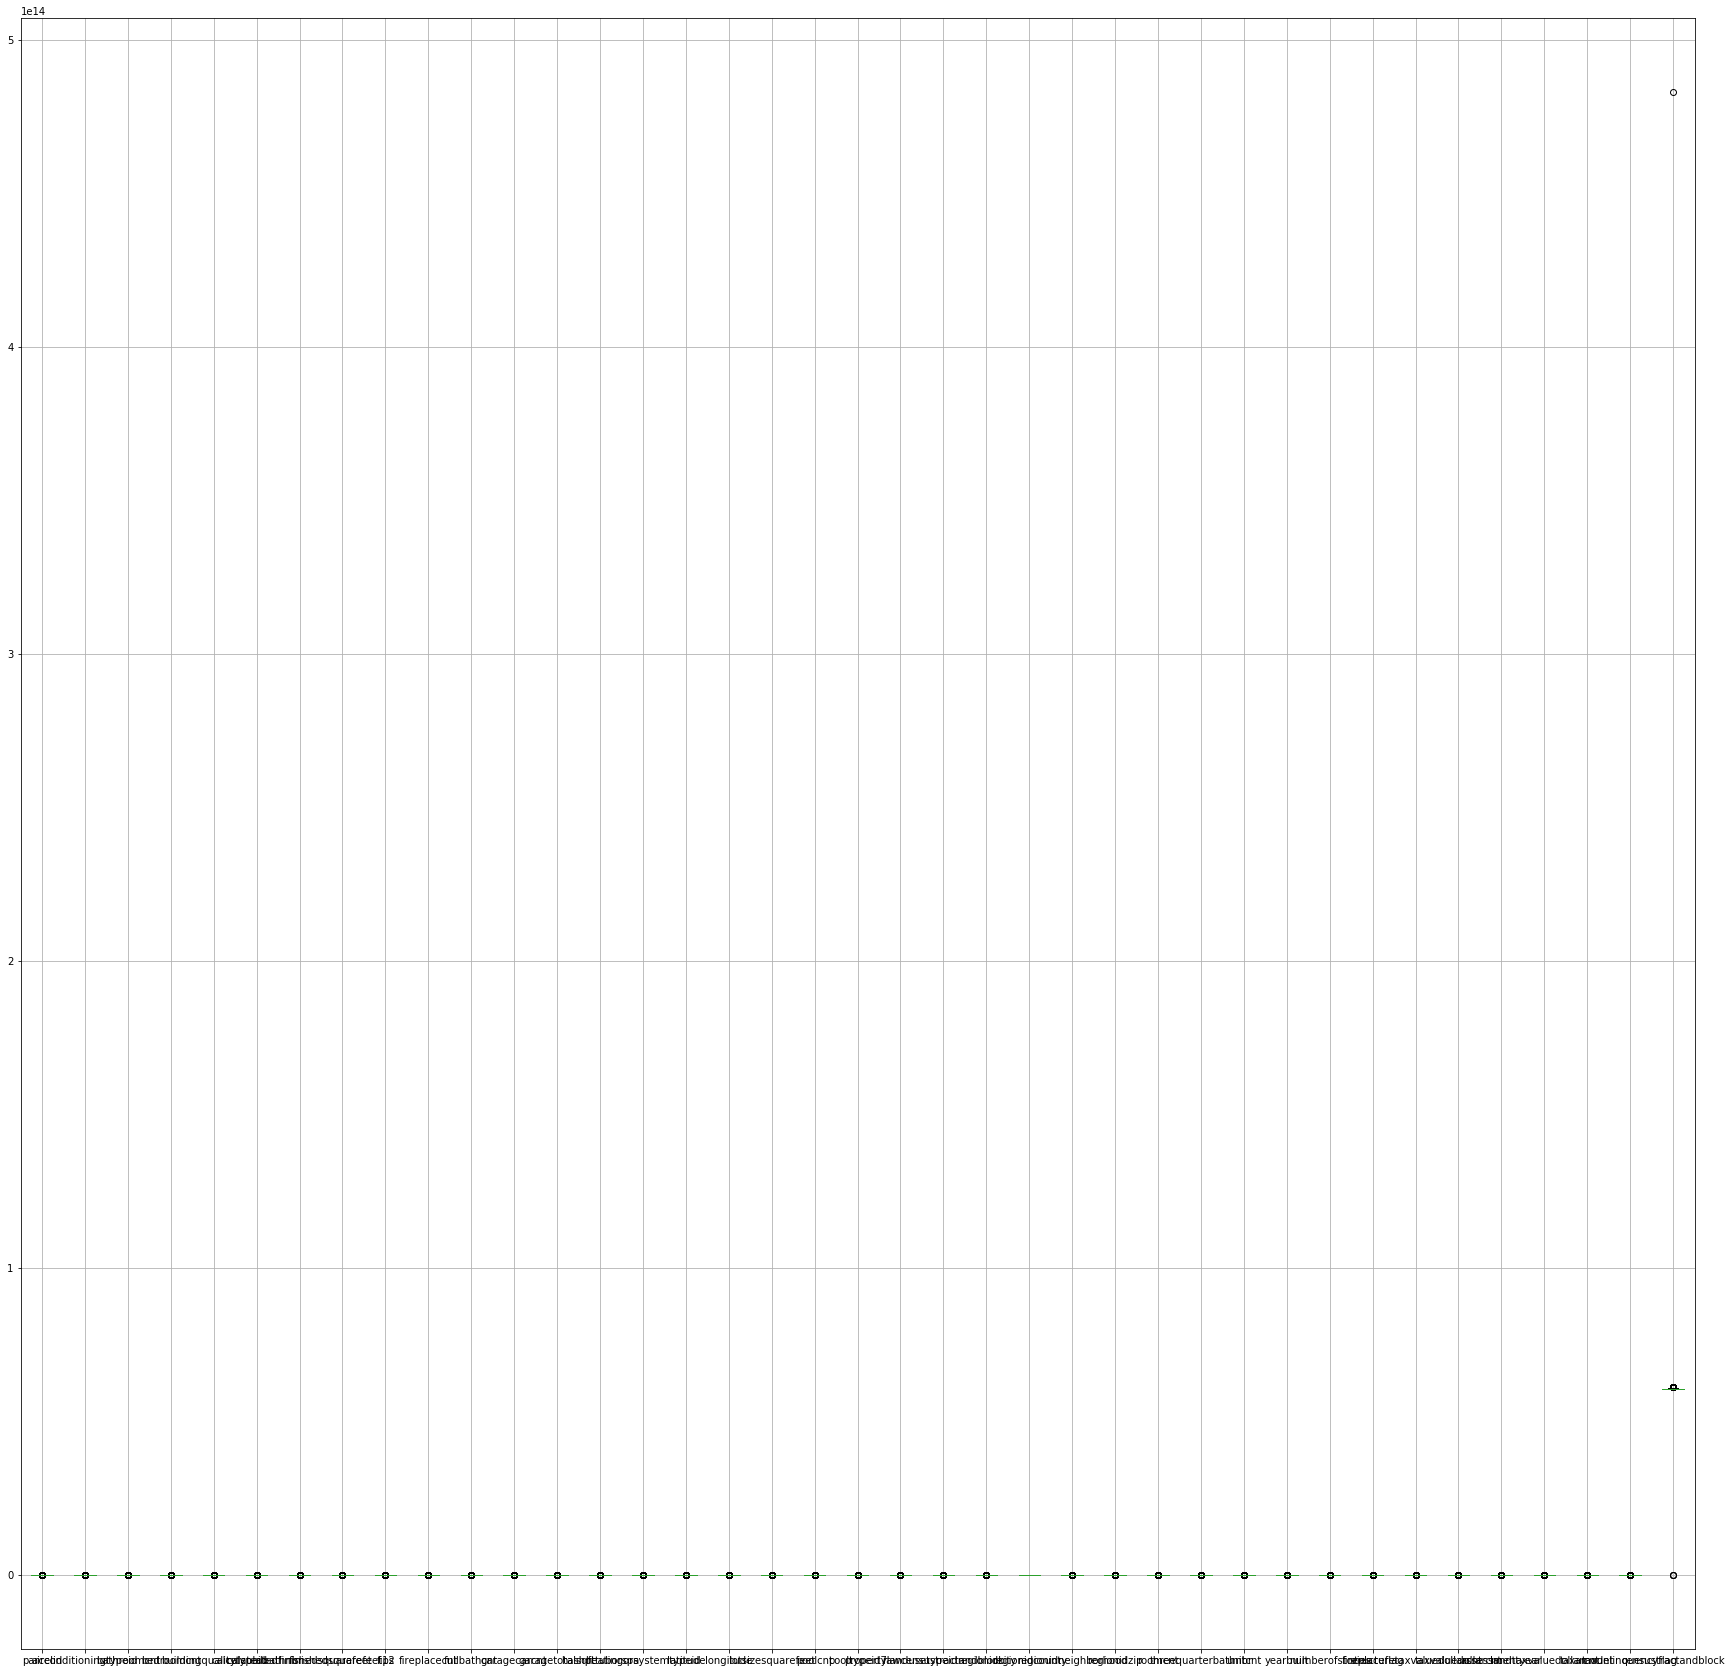

In [125]:
#make box plot 
#No useful information from box blot
df.boxplot(figsize=(30,30))
plt.show()

In [108]:
#Boxplot is one way of determining outliers. How else can we detect outliers?


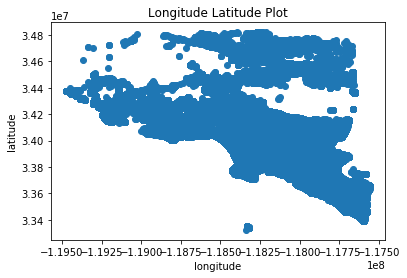

In [109]:
#plot lat and longitude with othser stuff on it
#will give us a plot of the region
plt.scatter(df['longitude'],df['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Longitude Latitude Plot")
#plt.scatter(df[df['regionidneighborhood'].isna()].loc[:,'latitude'],df['longitude'])
plt.show()

In [78]:
#perform correlation matrix 
#the features fips, racevensustractandblkc, cencustractandblock, roomcnt are correlated with parcei
corr_matrix = df.corr()
corr_matrix.sort_values(by='parcelid', ascending=False)

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
parcelid,1.000000,0.016176,-0.041051,-0.031117,0.096508,-0.000757,0.002859,0.032189,0.593670,0.099190,...,0.172329,0.072313,0.005723,0.003220,0.004463,-0.361958,0.009355,-0.013466,-0.018441,0.456183
fips,0.593670,0.076942,-0.019261,-0.011902,0.275388,0.020530,0.015805,0.069990,1.000000,0.582245,...,0.251261,0.408041,0.022611,0.013094,0.001595,0.003176,-0.004735,-0.020960,-0.047504,0.618314
rawcensustractandblock,0.593392,0.075627,-0.019169,-0.011617,0.273798,0.020714,0.015726,0.069933,0.999940,0.582229,...,0.252393,0.407140,0.022267,0.013188,0.001302,0.003156,-0.005324,-0.021095,-0.047325,0.618352
censustractandblock,0.456183,0.048763,-0.018041,-0.013870,0.172343,0.012454,0.018871,0.043199,0.618314,0.362667,...,0.159399,0.253721,0.013795,0.014271,0.003063,0.000192,-0.002270,-0.015252,-0.029452,1.000000
roomcnt,0.432083,0.298488,0.062613,0.162882,0.262292,0.023051,0.036318,0.106040,0.688492,0.619921,...,0.126897,0.578205,0.057810,-0.016016,0.002720,0.004897,0.015639,-0.021474,-0.042597,0.427881
regionidneighborhood,0.296987,0.019446,-0.021793,-0.009152,0.052984,-0.012659,0.007577,-0.009988,0.167313,0.045013,...,-0.043112,0.044066,0.011613,-0.001196,0.011881,NaN,0.024259,0.011880,-0.011198,0.171108
yearbuilt,0.172329,0.062476,0.328097,0.046866,-0.221811,0.363602,0.115244,0.268415,0.251261,0.145144,...,1.000000,0.138590,0.015776,0.184827,0.137470,0.005985,0.064249,0.122270,-0.042432,0.159399
garagetotalsqft,0.105617,0.254200,0.180025,0.214175,0.259775,0.153028,0.117959,0.270418,0.593559,0.525256,...,0.235958,0.412829,0.021829,0.072087,0.097518,0.006574,0.091360,0.066918,-0.043754,0.368045
fireplacecnt,0.099190,0.148616,0.099463,0.121144,0.159052,0.085977,0.068779,0.157948,0.582245,1.000000,...,0.145144,0.412714,-0.013139,0.033211,0.039093,0.002508,0.031996,0.017014,-0.030035,0.362667
buildingqualitytypeid,0.096508,0.074123,-0.219897,-0.063259,1.000000,-0.197744,-0.051936,-0.124422,0.275388,0.159052,...,-0.221811,0.149977,0.020973,-0.036462,-0.018735,-0.007420,0.005443,-0.029221,0.001702,0.172343


In [186]:
#perform correlation matrix on dflogerror relatvie to log error
logerror_corr_matrix = dflogerror.corr()
logerror_corr_matrix.sort_values(by='logerror',ascending=False)

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror
logerror,0.004837,0.004046,0.027889,0.025467,-0.006406,0.028788,0.038546,0.039817,0.008363,0.007746,...,0.006463,0.001174,0.022481,0.006526,NaN,-0.003037,-0.006670,0.018936,0.009579,1.000000
finishedsquarefeet12,0.031026,0.071324,0.727689,0.550369,-0.102360,0.746465,0.945992,1.000000,0.080165,0.185036,...,0.143513,-0.017654,0.726037,0.608217,NaN,0.463983,0.591152,-0.027198,0.081510,0.039817
calculatedfinishedsquarefeet,0.016333,0.064209,0.763453,0.622552,-0.081629,0.793702,1.000000,0.945992,0.057076,0.165727,...,0.137928,-0.019163,0.708411,0.595789,NaN,0.455938,0.582861,-0.022513,0.058443,0.038546
calculatedbathnbr,-0.004228,0.030230,0.974316,0.600204,-0.182158,1.000000,0.793702,0.746465,0.027419,0.100398,...,0.094087,-0.011350,0.603837,0.492562,NaN,0.367469,0.480616,-0.033769,0.028481,0.028788
fullbathcnt,-0.061692,0.007919,0.957288,0.594034,-0.223046,0.984119,0.773329,0.720955,-0.043420,0.058227,...,0.027707,-0.020060,0.584962,0.476032,NaN,0.354471,0.469680,-0.026239,-0.042198,0.028197
bathroomcnt,-0.014073,0.031425,1.000000,0.646120,-0.189585,0.974316,0.763453,0.727689,0.009485,0.101179,...,0.083684,-0.009697,0.583778,0.476363,NaN,0.353807,0.461893,-0.033279,0.017325,0.027889
bedroomcnt,0.004971,0.047160,0.646120,1.000000,-0.025742,0.600204,0.622552,0.550369,0.023550,0.130612,...,0.095356,-0.024576,0.304933,0.241335,NaN,0.173210,0.239064,-0.006528,0.033672,0.025467
structuretaxvaluedollarcnt,0.008359,0.000505,0.583778,0.304933,-0.049709,0.603837,0.708411,0.726037,0.037372,0.075516,...,0.019545,-0.016608,1.000000,0.824661,NaN,0.620923,0.791790,-0.024617,0.037858,0.022481
taxdelinquencyflag,-0.041995,-0.014613,-0.033279,-0.006528,0.002504,-0.033769,-0.022513,-0.027198,-0.051778,-0.030613,...,-0.032963,-0.007048,-0.024617,-0.025270,NaN,-0.022189,-0.010252,1.000000,-0.051070,0.018936
yearbuilt,0.165556,0.037501,0.369439,0.050265,-0.200524,0.369274,0.212039,0.262640,0.237603,0.120736,...,0.119826,0.010862,0.295682,0.139967,NaN,0.039283,0.113739,-0.063677,0.239594,0.017192


In [189]:
#What are the features that have a correlation greater than 0.001
logerror_corr_matrix[logerror_corr_matrix['logerror'] >0.001]

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror
parcelid,1.000000,0.076043,-0.014073,0.004971,0.269848,-0.004228,0.016333,0.031026,0.666831,0.385363,...,0.307882,0.028387,0.008359,0.003825,NaN,0.000998,-0.030727,-0.041995,0.659734,0.004837
airconditioningtypeid,0.076043,1.000000,0.031425,0.047160,0.082669,0.030230,0.064209,0.071324,0.073880,0.124177,...,0.263111,0.018733,0.000505,0.010624,NaN,0.014298,-0.005648,-0.014613,0.073628,0.004046
bathroomcnt,-0.014073,0.031425,1.000000,0.646120,-0.189585,0.974316,0.763453,0.727689,0.009485,0.101179,...,0.083684,-0.009697,0.583778,0.476363,NaN,0.353807,0.461893,-0.033279,0.017325,0.027889
bedroomcnt,0.004971,0.047160,0.646120,1.000000,-0.025742,0.600204,0.622552,0.550369,0.023550,0.130612,...,0.095356,-0.024576,0.304933,0.241335,NaN,0.173210,0.239064,-0.006528,0.033672,0.025467
calculatedbathnbr,-0.004228,0.030230,0.974316,0.600204,-0.182158,1.000000,0.793702,0.746465,0.027419,0.100398,...,0.094087,-0.011350,0.603837,0.492562,NaN,0.367469,0.480616,-0.033769,0.028481,0.028788
calculatedfinishedsquarefeet,0.016333,0.064209,0.763453,0.622552,-0.081629,0.793702,1.000000,0.945992,0.057076,0.165727,...,0.137928,-0.019163,0.708411,0.595789,NaN,0.455938,0.582861,-0.022513,0.058443,0.038546
finishedsquarefeet12,0.031026,0.071324,0.727689,0.550369,-0.102360,0.746465,0.945992,1.000000,0.080165,0.185036,...,0.143513,-0.017654,0.726037,0.608217,NaN,0.463983,0.591152,-0.027198,0.081510,0.039817
fips,0.666831,0.073880,0.009485,0.023550,0.314533,0.027419,0.057076,0.080165,1.000000,0.605383,...,0.453188,0.024101,0.037372,0.013088,NaN,-0.001069,-0.030606,-0.051778,0.992625,0.008363
fireplacecnt,0.385363,0.124177,0.101179,0.130612,0.173507,0.100398,0.165727,0.185036,0.605383,1.000000,...,0.426867,-0.015734,0.075516,0.060771,NaN,0.044553,0.024432,-0.030613,0.609340,0.007746
fullbathcnt,-0.061692,0.007919,0.957288,0.594034,-0.223046,0.984119,0.773329,0.720955,-0.043420,0.058227,...,0.027707,-0.020060,0.584962,0.476032,NaN,0.354471,0.469680,-0.026239,-0.042198,0.028197


In [191]:
#train models with the following 26 feature 
logerror_corr_features = logerror_corr_matrix[logerror_corr_matrix['logerror'] >0.001].index

In [112]:
%%HTML
<h3> Standardize </h3>

In [113]:
dfstand = StandardScaler().fit_transform(df)

In [114]:
dfstand

array([[-0.32512297, -2.05281762, -2.42544057, ..., -0.5442203 ,
        -0.13884703, -0.31899147],
       [-0.32444029, -2.05281762, -2.42544057, ..., -0.5442203 ,
        -0.13884703, -0.31899147],
       [-0.31382077, -2.05281762, -2.42544057, ...,  1.69144181,
        -0.13884703, -0.31899147],
       ...,
       [19.55947597, -0.19366741, -0.06958234, ..., -0.5442203 ,
        -0.13884703, -0.31899147],
       [19.55950126, -0.19366741, -0.06958234, ..., -0.5442203 ,
        -0.13884703, -0.31899147],
       [19.55945069, -0.19366741, -0.06958234, ..., -0.5442203 ,
        -0.13884703, -0.31899147]])

In [96]:
%%HTML
<h3> Perform KMeans Clustering </h3>

In [97]:
#perform KMeans and find similarities in featues
kmeans = KMeans()

In [98]:
inertia = []
for i in range(1,9):
    kmeans.set_params(n_clusters=i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'interia')

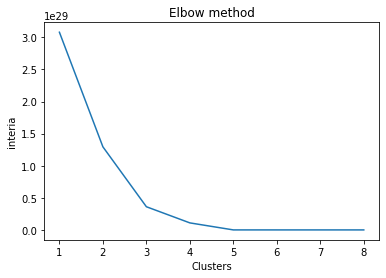

In [99]:
#make elbow plot
#use n = 3 clusters
plt.plot(range(1,9),inertia)
plt.title("Elbow method")
plt.xlabel('Clusters')
plt.ylabel('interia')
plt.show()

In [100]:
#set nclusters to 3
#also try 4 clusters
kmeans.set_params(n_clusters=3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
#Predict
predict = kmeans.fit_predict(df)

In [161]:
#predict with dfstand
predictStand = kmeans.fit_predict(dfstand)

In [104]:
predict.shape

(2985217,)

In [162]:
predictStand.shape

(2985217,)

In [105]:
#filter df based on predicted values
dfLabel0 = df[predict==0]
dfLabel1 = df[predict==1]
dfLabel2 = df[predict==2]

In [163]:
#filter dfstand 
dfstand0 = dfstand[predictStand==0]
dfstand1 = dfstand[predictStand==1]
dfstand2 = dfstand[predictStand==2]

In [183]:
dfstand2.shape

(875123, 40)

In [106]:
centers = kmeans.cluster_centers_
centers.shape

(3, 40)

In [167]:
#centers for standardized data
centersStand = kmeans.cluster_centers_
centersStand.shape

(3, 40)

In [152]:
centers[1,16]

-118048405.0

In [153]:
centers[1][16]

-118048405.0

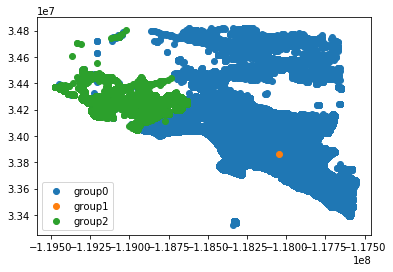

In [185]:
#Plot clusters
plt.scatter(dfLabel0.loc[:,'longitude'], dfLabel0.loc[:,'latitude'], label='group0')
plt.scatter(dfLabel1.loc[:,'longitude'], dfLabel1.loc[:,'latitude'],label='group1')
plt.scatter(dfLabel2.loc[:,'longitude'], dfLabel2.loc[:,'latitude'],label='group2')
#plt.scatter(centers[0,15], centers[0,16],c='black', alpha =0.5)
#plt.scatter(centers[1,15], centers[1,16],c='black', alpha =0.5)
#plt.scatter(centers[2,15], centers[2,16],c='black', alpha =0.5)
plt.legend()
plt.show()

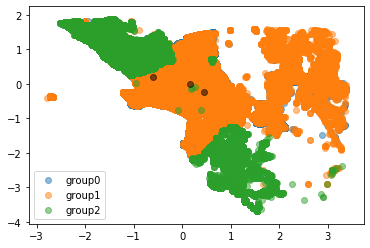

In [180]:
#Plot clusters of standardized data 
plt.scatter(dfstand0[:,15], dfstand0[:,16],alpha=0.5,label='group0')
plt.scatter(dfstand1[:,15], dfstand1[:,16],alpha=0.5,label='group1')
plt.scatter(dfstand2[:,15], dfstand2[:,16],alpha=0.5,label='group2')
plt.scatter(centersStand[0,15], centersStand[0,16],c='black', alpha =0.5)
plt.scatter(centersStand[1,15], centersStand[1,16],c='black', alpha =0.5)
plt.scatter(centersStand[2,15], centersStand[2,16],c='black', alpha =0.5)
plt.legend()
plt.show()

In [124]:
%%HTML
<h3> Perform PCA </h3>

In [125]:
#Perform PCA and reduce dimensionality of data
#all features must be intergers or flots
#must scale features before we do PCA with StandardScalar
pca = PCA()
#set params 0.9
pca.set_params(n_components =12)
p_components = pca.fit_transform(dfstand)

In [126]:
p_components.shape

(2985217, 12)

In [127]:
#find total variance
totalvar = 0
for var in pca.explained_variance_:
    totalvar+=var

In [128]:
#percent variance of each feature
percent_var=pca.explained_variance_/totalvar*100

In [129]:
#cumulative variance
cum_var = []
for i in range(len(percent_var)):
    cum_var.append(percent_var[i])
for i in range(len(percent_var)):
    for j in range(0,i):
        cum_var[i] = cum_var[i]+percent_var[j]

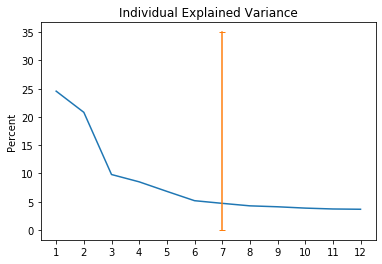

In [130]:
#plot percent explained variance
plt.plot(range(1,len(percent_var)+1),percent_var)
plt.xticks(range(1,len(percent_var)+1))
plt.plot([7,7],[0,35],marker='_')
plt.ylabel('Percent')
plt.title('Individual Explained Variance')
plt.show()

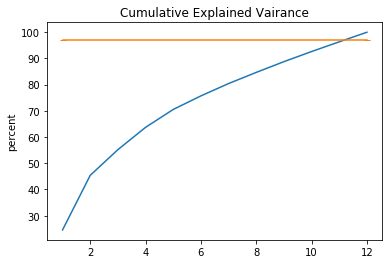

In [131]:
#plot cumulative explained variance 

plt.plot(range(1,len(cum_var)+1),cum_var)
plt.ylabel('percent')
plt.plot([1,12],[97,97],marker='_')
plt.title('Cumulative Explained Vairance')
plt.show()

In [132]:
#we should use 10 componens
print("8 components: %d%% of variance\n" %cum_var[7])
print("10 components: %d%% of variance\n" %cum_var[9])
print("12 components: %d%% of variance\n" %cum_var[11])

8 components: 84% of variance

10 components: 92% of variance

12 components: 99% of variance



In [133]:
#PCA with n=10
pca.set_params(n_components=10)
p_components = pca.fit_transform(dfstand)

In [134]:
p_components.shape

(2985217, 10)

In [135]:
#find explained variance ratio of each components\
pca.explained_variance_ratio_

array([0.16603075, 0.1406863 , 0.06629192, 0.05752911, 0.04613041,
       0.03494881, 0.0317988 , 0.02890355, 0.02772204, 0.02602801])

In [136]:
pcadf =pd.DataFrame(pca.fit_transform(dfstand))

In [137]:
pcadf.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.409437,-1.242809,0.137260,1.281232,-0.020889,0.441283,-0.092905,0.746427,-0.037270,0.434666
1,-2.427883,-1.190146,0.251754,1.280029,0.025063,0.284920,0.088732,0.925655,-0.028653,0.400187
2,4.170024,9.167179,10.250631,5.781485,3.055427,-8.761084,16.661429,9.684658,1.498877,3.402113
3,-1.031319,0.548219,4.472991,2.817451,0.932829,-3.840396,6.435777,5.557603,0.784800,1.716324
4,-1.739794,-0.775395,3.203911,2.042115,1.096144,-4.200876,6.743862,5.773960,0.864364,1.883330


In [325]:
#How are the features related to the components?
featurecomponents = pd.DataFrame(pca.components_,columns =df.columns,index=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [326]:
featurecomponents

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
PC1,0.045185,0.090088,0.239349,0.168232,0.035434,0.248792,0.182516,0.258051,0.234464,0.212228,...,0.177994,0.187900,0.011413,0.182603,0.211381,0.000322,0.180135,0.195018,-0.024114,0.161169
PC2,-0.076583,-0.061106,0.236985,0.158520,-0.172843,0.239264,0.177049,0.193530,-0.276050,-0.170601,...,0.001684,-0.152430,-0.019917,0.193763,0.219549,0.000174,0.183317,0.220730,0.013458,-0.191132
PC3,0.000079,0.043497,-0.230409,-0.198672,0.227892,-0.206020,0.137026,-0.072175,-0.058157,-0.091106,...,-0.154760,-0.017420,0.015940,0.299793,0.353841,-0.013349,0.309325,0.343157,0.009595,-0.049552
PC4,0.035282,-0.167470,-0.150253,-0.178750,-0.085480,-0.119570,0.061039,-0.046004,0.220165,0.127982,...,-0.012766,-0.039070,-0.048978,0.188516,0.175103,-0.010680,0.119428,0.174781,0.013270,0.184399
PC5,0.070159,-0.113973,0.152866,0.182861,0.062485,0.169590,0.065047,0.016305,0.070831,-0.009467,...,-0.003368,-0.054862,-0.098740,-0.028590,-0.059552,-0.011302,-0.070848,-0.053744,0.004607,0.066290
PC6,0.013015,0.072194,0.017722,0.269541,0.308499,-0.006445,0.115962,0.006155,0.036677,0.154750,...,-0.502827,0.123522,0.020592,-0.065958,-0.063097,-0.002177,-0.047096,-0.061020,0.051509,0.040331
PC7,0.120102,-0.172111,0.030809,-0.054330,-0.044708,0.097916,0.113893,-0.079860,0.057615,-0.179578,...,0.081630,-0.096489,0.113272,0.009669,-0.044575,-0.115321,-0.079317,-0.036854,-0.058350,0.050744
PC8,-0.166458,0.310567,-0.128966,-0.170836,-0.150019,-0.032618,0.330079,-0.011238,-0.064790,0.050486,...,0.119738,0.085917,-0.137943,0.056099,-0.110377,0.070686,-0.230635,-0.103748,0.014936,-0.087897
PC9,0.482761,0.001117,-0.044984,-0.047507,0.073050,-0.022927,-0.031237,0.048856,-0.045095,-0.027016,...,-0.074780,-0.146235,-0.174303,-0.033738,-0.012511,-0.470723,0.018161,-0.015797,0.058990,-0.055882
PC10,0.354809,0.036172,-0.006051,-0.018522,-0.021932,0.003442,0.063524,-0.019646,0.005883,0.024743,...,0.051677,0.064074,0.061786,0.023113,-0.013700,-0.561034,-0.039893,-0.017135,-0.190135,0.010532


In [138]:
pcadf.shape

(2985217, 10)

In [335]:
trainData.shape

(90275, 3)

In [142]:
#make new df containing PCA data and logerror
pcalogerror = pd.concat([pcadf, trainData['logerror']], axis=1)

In [155]:
pcalogerror.head()

,0,1,2,3,4,5,6,7,8,9,logerror
0,-2.409437,-1.242809,0.137260,1.281232,-0.020889,0.441283,-0.092905,0.746427,-0.037270,0.434666,0.0276
1,-2.427883,-1.190146,0.251754,1.280029,0.025063,0.284920,0.088732,0.925655,-0.028653,0.400187,-0.1684
2,4.170024,9.167179,10.250631,5.781485,3.055427,-8.761084,16.661429,9.684658,1.498877,3.402113,-0.0040
3,-1.031319,0.548219,4.472991,2.817451,0.932829,-3.840396,6.435777,5.557603,0.784800,1.716324,0.0218
4,-1.739794,-0.775395,3.203911,2.042115,1.096144,-4.200876,6.743862,5.773960,0.864364,1.883330,-0.0050


In [164]:
pcalogerror.iloc[:,10].isna().sum()

2894942

In [116]:
dflogerror.iloc[:,:40]

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock,logerror,transactiondate
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,0.0,2.0,...,0,115087.0,191811.0,2015.0,76724.0,2015.06,0,6.111002e+13,0.0953,2016-01-27
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,0.0,1.0,...,0,143809.0,239679.0,2015.0,95870.0,2581.30,0,6.111002e+13,0.0198,2016-03-30
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,0.0,2.0,...,0,33619.0,47853.0,2015.0,14234.0,591.64,0,6.111001e+13,0.0060,2016-05-27
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,1.0,...,0,45609.0,62914.0,2015.0,17305.0,682.78,0,6.111001e+13,-0.0566,2016-06-07
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,1.0,2.0,...,0,277000.0,554000.0,2015.0,277000.0,5886.92,0,6.111001e+13,0.0573,2016-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,11876798,3.0,4.0,4.0,3.0,2068.0,2068.0,6037.0,0.0,3.0,...,0,388582.0,596082.0,2015.0,207500.0,7335.81,0,6.037201e+13,0.0276,2016-04-15
90271,12808516,2.0,3.0,7.0,2.0,1352.0,1352.0,6037.0,0.0,2.0,...,0,86209.0,178408.0,2015.0,92199.0,2441.74,0,6.037407e+13,-0.1188,2016-06-07
90272,12010248,2.0,2.0,4.0,2.0,860.0,860.0,6037.0,0.0,2.0,...,0,129000.0,420000.0,2015.0,291000.0,5070.41,0,6.037191e+13,0.0843,2016-06-30
90273,14310905,2.5,3.0,7.0,2.5,2268.0,2268.0,6059.0,0.0,2.0,...,0,389474.0,1215816.0,2015.0,826342.0,12508.30,0,6.037920e+13,-0.0050,2016-03-31


In [117]:
%%HTML
<h3> Train Test Split </h3>

In [184]:
#split into train and test using dflogerror 
xTr, xTe, yTr, yTe = train_test_split(dflogerror.loc[:,:'censustractandblock'],dflogerror['logerror'],test_size=0.2)

In [185]:
#Check shape and head
xTr.shape, xTe.shape, yTr.shape, yTe.shape

((72220, 36), (18055, 36), (72220,), (18055,))

In [186]:
xTr.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
32366,13991826,0.0,0.0,7.0,2.0,1462.0,1440.0,6059.0,0.0,2.0,...,1954.0,3.0,0,100000.0,163196.0,2015.0,163196.0,5333.58,0,6.059088e+13
48137,14238785,2.0,3.0,7.0,2.0,1626.0,1626.0,6059.0,0.0,2.0,...,1960.0,1.0,0,111912.0,577000.0,2015.0,465088.0,6523.08,0,6.059076e+13
50407,14383082,2.5,3.0,7.0,2.5,2139.0,2139.0,6059.0,0.0,2.0,...,1978.0,2.0,0,154948.0,683773.0,2015.0,528825.0,7099.48,0,6.059042e+13
75140,12977011,1.0,3.0,7.0,1.0,1274.0,1274.0,6037.0,0.0,1.0,...,1935.0,1.0,0,44131.0,294255.0,2015.0,250124.0,4562.94,0,6.037433e+13
46248,12947208,2.0,4.0,7.0,2.0,1604.0,1604.0,6037.0,0.0,2.0,...,1955.0,1.0,0,49550.0,64622.0,2015.0,15072.0,1024.34,0,6.037407e+13


In [187]:
yTr.head()

32366   -0.2917
48137   -0.0305
50407    0.1204
75140   -0.0233
46248    0.2303
Name: logerror, dtype: float64

In [188]:
%%HTML
<h3> Perform Linear Regression </h3>

In [189]:
#linear regression
linear = LinearRegression()

In [190]:
#fit model 
linear.fit(xTr, yTr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
#make prediction 
yTr_pred = linear.predict(xTr)

In [192]:
#Try prediction on test
yTe_pred = linear.predict(xTe)

In [268]:
#find score
linear_score = linear.score(xTe,yTe)
linear_score

-0.0004453336703476029

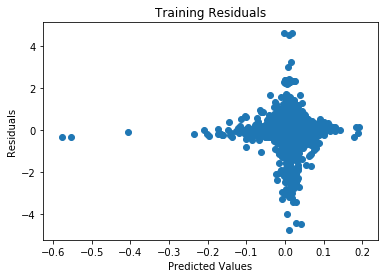

In [198]:
plt.scatter(yTr_pred,yTr_pred-yTr, label='traindata')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Training Residuals')
plt.show()

In [201]:
print('RMSE train: %.3f' %math.sqrt(mean_squared_error(yTr, yTr_pred)))
print('R^2 train: %.3f' %(r2_score(yTr,yTr_pred)))

RMSE train: 0.161
R^2 train: 0.006


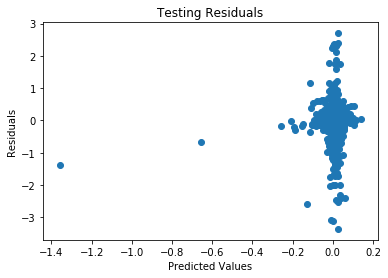

In [199]:
plt.scatter(yTe_pred,yTe_pred-yTe, label='traindata')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Testing Residuals')
plt.show()

In [194]:
#find RMSE of yTe_pred
linear_rmse = math.sqrt(mean_squared_error(yTe, yTe_pred))

In [200]:
#find MSE and R2 values to determine goodness of fit
print('RMSE test: %.3f' %linear_rmse)
print('R^2 test: %.3f' %(r2_score(yTe,yTe_pred)))

RMSE test: 0.158
R^2 test: -0.000


In [145]:
#RMSE is 0.158
#R2 is 0
#Both values are suspicous. Model is underfitting

In [202]:
%%HTML
<h3> Perform Decision Tree </h3>

In [203]:
#first must cacluate Gini Index to determine which feature to split on first
def purity(L, metric='gini'):
    total = len(L)
    freq = map(lambda x: float(x) / total, list(Counter(L).values()))
    if metric =='gini':
        scores = map(lambda x: x *(1-x),freq)
    elif metric == 'entropy':
        scores = map(lambda x: -x * math.log(x,2),freq)
    return sum(scores)

In [204]:
dflogerror.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yearbuilt', 'numberofstories',
       'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinquencyflag', 'censustractandblock', 'logerror'],
      dtype='object')

In [205]:
#find purity of remaining features 
for feat in dflogerror.columns:
    L = list(dflogerror[feat])
    print(feat,purity(L))

parcelid 0.9999888918152693
bathroomcnt 0.7489949733425539
bedroomcnt 0.7285822755954854
buildingqualitytypeid 0.45410647035992124
calculatedbathnbr 0.7384095200662677
calculatedfinishedsquarefeet 0.9994020229734911
finishedsquarefeet12 0.9966782168489224
fips 0.49896889054269006
fireplacecnt 0.19317093532707724
fullbathcnt 0.6512174471661525
garagecarcnt 0.16373521069080213
garagetotalsqft 0.4058395894694146
hashottuborspa 0.05102281629541905
latitude 0.9999731847397496
longitude 0.9999445447208257
lotsizesquarefeet 0.9841192404423846
poolcnt 0.31794710144799715
pooltypeid7 0.3014959115739232
propertycountylandusecode 0.8247732872593605
propertyzoningdesc 0.8041543203668634
rawcensustractandblock 0.9999440178219636
regionidcity 0.9307247723098464
regionidcounty 0.49896889054269006
roomcnt 0.3943837613016813
threequarterbathnbr 0.2309451528035854
unitcnt 0.08265606787347285
yearbuilt 0.9863644969856943
numberofstories 0.17255987853968782
fireplaceflag 0.004906210315705815
structuretaxv

In [206]:
# features with highest purity include logerror, transactiondate, taxamount, tacvaluedollarcnt,
#structurtaxvaluedollarcount, yearbuilt,regionidzip,regioidcity, lotsizesqfeet, longitude, latitude, finishedaq12
#It doesn't make sense to split on some of the highes IG as their values are all unique/continuous
#We will split on yearbuilt, regionidzip, lotsizessquarefeet, calculatedfinishedsquarefeet

In [207]:
#init decision tree regressor because we have some continuous calues
tree_model = tree.DecisionTreeRegressor()

In [208]:
#fit model
tree_model.fit(xTr, yTr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [209]:
#find score
train_score = tree_model.score(xTr, yTr)
train_score

0.9993977821483592

In [210]:
#find train error
train_error = (1 -train_score)
print('The train error is %.5f' %train_error)

The train error is 0.00060


In [211]:
#find feature importance
tree_importance = pd.DataFrame(tree_model.feature_importances_,index=xTr.columns,columns =['Importance'])
tree_importance.sort_values(['Importance'],ascending=False)

,Importance
taxamount,0.126796
structuretaxvaluedollarcnt,0.086261
latitude,0.081706
longitude,0.077563
taxvaluedollarcnt,0.067740
yearbuilt,0.065484
lotsizesquarefeet,0.064621
landtaxvaluedollarcnt,0.063907
parcelid,0.060698
finishedsquarefeet12,0.044918


In [212]:
#make prediction
yTr_tree_pred = tree_model.predict(xTr)

In [213]:
yTr_tree_pred

array([-0.2917, -0.0305,  0.1204, ...,  0.0149,  0.2398,  0.006 ])

In [214]:
#Make prediction on test set 
yTe_tree_pred = tree_model.predict(xTe)

In [215]:
yTe_tree_pred

array([-0.0161,  0.006 ,  0.0119, ..., -0.1301,  0.0188,  0.0363])

In [269]:
#find test score
tree_test_score = tree_model.score(xTe,yTe)
tree_test_score

-1.3033976152438749

In [217]:
#find test error
test_error = (1-test_score)
print("The test error is %.5f" %test_error)

The test error is 2.30340


In [218]:
#find RMSE of decision tree
tree_rmse = math.sqrt(mean_squared_error(yTe, yTe_tree_pred))
tree_rmse

0.23907281223275562

In [219]:
%%HTML
<h3> Perform Random Forest </h3>

In [220]:
forest = RandomForestRegressor()

In [221]:
#fit model against training data 
forest.fit(xTr,yTr)

c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [224]:
#find n_features when fit. 36 features used
forest.n_features_

36

In [225]:
#find train score
train_RF_score = forest.score(xTr, yTr)
train_RF_score

0.8058667451865342

In [226]:
#find train error
train_RF_error = (1- train_RF_score)
print("The train error is %.5f" %train_RF_error)

The train error is 0.19413


In [227]:
#find test score and test error
test_RF_score = forest.score(xTe,yTe)
test_RF_score

-0.13400968181963901

In [228]:
#test error. unsuallt high test error
test_RF_error = (1-test_RF_score)
print("the test error is %.5f" %test_RF_error)

the test error is 1.13401


In [229]:
#make test and train prediction 
yTr_RF_pred = forest.predict(xTr)

In [230]:
yTr_RF_pred

array([-0.164  , -0.01129,  0.08135, ...,  0.00842,  0.15879, -0.02393])

In [231]:
#make test prediction
yTe_RF_pred = forest.predict(xTe)

In [232]:
yTe_RF_pred

array([ 0.01129, -0.00582, -0.00217, ..., -0.03736,  0.05149,  0.03271])

In [233]:
#find RMSE of pred
RF_rmse = math.sqrt(mean_squared_error(yTe, yTe_RF_pred))
RF_rmse

0.16774675011413284

In [234]:
#find randomforest feature importance
RF_importance = pd.DataFrame(forest.feature_importances_, index=xTr.columns,columns=['Importance'])
RF_importance.sort_values(['Importance'],ascending=False)

,Importance
structuretaxvaluedollarcnt,0.091682
taxamount,0.087415
latitude,0.079302
lotsizesquarefeet,0.077510
longitude,0.073731
landtaxvaluedollarcnt,0.069567
taxvaluedollarcnt,0.064138
parcelid,0.062726
yearbuilt,0.061249
finishedsquarefeet12,0.054996


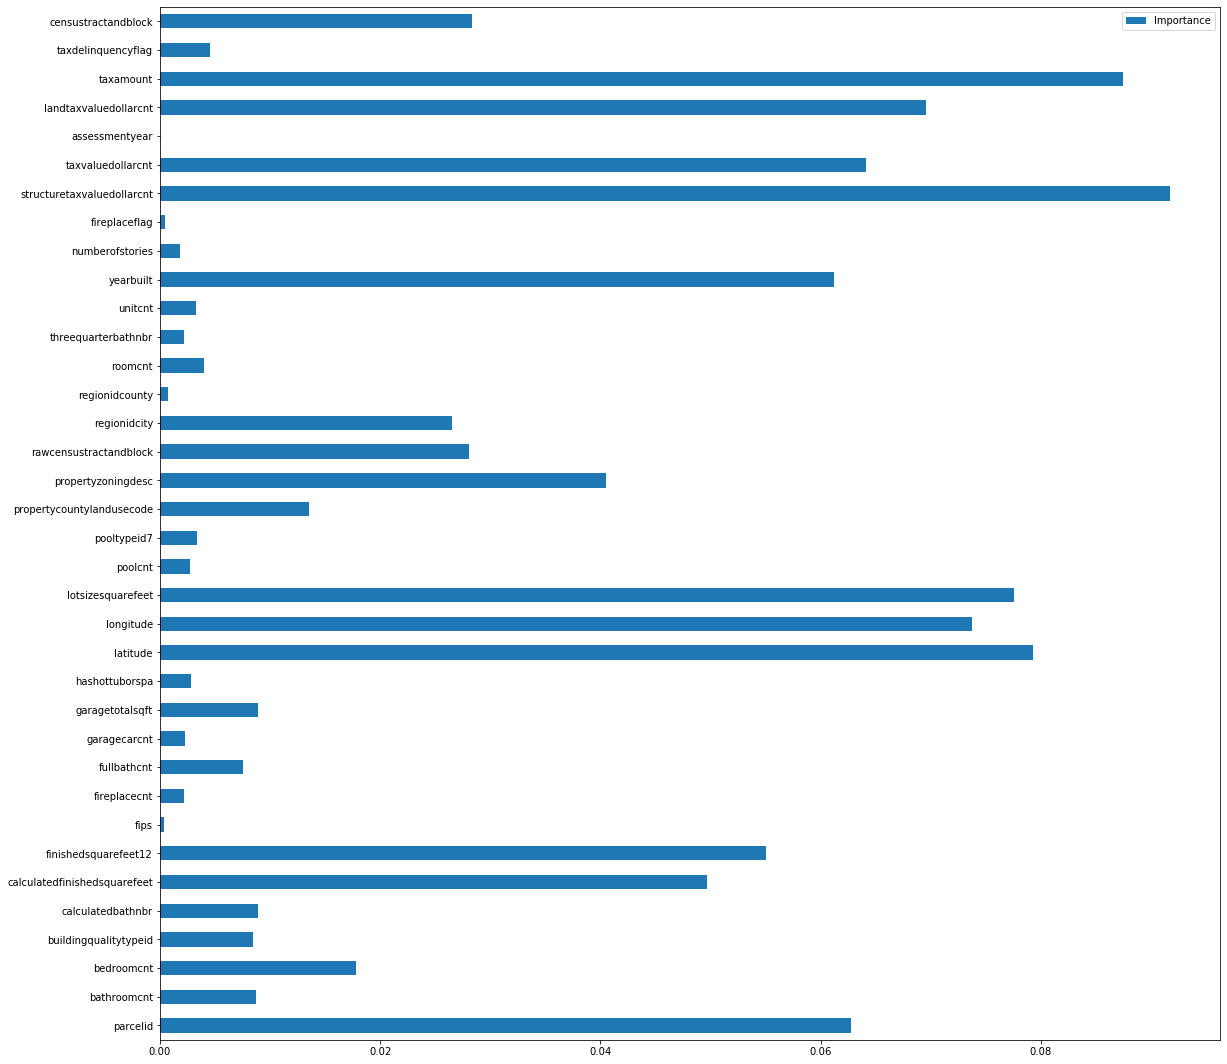

In [235]:
RF_importance.plot(kind='barh', figsize=(19,19))
plt.show()

In [296]:
%%HTML
<h3> What are the top 5 most weighted features in overpriced houses? </h3>

In [ ]:
#The top 5 most weighted features are strucutretaxvaluedollarcnt, latitude, longitude, lotsizesquarefeet, and taxamount

In [236]:
%%HTML
<h3> Perform XGBoost </h3>

In [237]:
#define xgb regressor
xgbreg = xgb.XGBRegressor()

In [238]:
#fit on training data
xgbreg.fit(xTr, yTr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [239]:
#find feature importance
xgbfeatures = pd.DataFrame(xgbreg.feature_importances_,index =xTr.columns, columns=['Importance'])
xgbfeatures.sort_values(by='Importance', ascending=False)

,Importance
hashottuborspa,0.064864
fireplacecnt,0.049037
finishedsquarefeet12,0.048445
taxvaluedollarcnt,0.044485
regionidcity,0.041762
latitude,0.041598
structuretaxvaluedollarcnt,0.041386
taxamount,0.040468
longitude,0.038663
calculatedfinishedsquarefeet,0.037191


In [240]:
#make prediction on test and train
xgb_yTr_pred = xgbreg.predict(xTr)
xgb_yTe_pred= xgbreg.predict(xTe)


c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [272]:
xgb_score = xgbreg.score(xTe,yTe)
xgb_score

c:\users\kwaz9\appdata\local\programs\python\python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


-0.03025216263398045

In [241]:
#find RMSE for pred. truth, pred
xgb_rmse = math.sqrt(mean_squared_error(yTe, xgb_yTe_pred))
xgb_rmse

0.15988860051278028

In [242]:
%%HTML
<h3> Perform ensemble methods </h3>

In [244]:
linear_rmse,tree_rmse, RF_rmse, xgb_rmse

(0.15755870957756218,
 0.23907281223275562,
 0.16774675011413284,
 0.15988860051278028)

In [250]:
weights = 0.25
linear_enseble = weights*linear_rmse
tree_ensemble = weights* tree_rmse
RF_ensemble = weights*RF_rmse
xgb_ensemble = weights*xgb_rmse
ensemble = np.sum([linear_enseble,tree_ensemble,RF_ensemble,xgb_ensemble])
ensemble

0.18106671810930774

In [251]:
%%HTML
<h3> Make Final Table </h3>

In [274]:
finalresults = pd.DataFrame(data=[[linear_rmse,36,linear_score, 'No'],[tree_rmse ,36,tree_test_score, 'No'],[RF_rmse,36,test_RF_score, 'No'],[xgb_rmse,36,xgb_score, 'No'],[ensemble, 36,'NA','No']], columns=['RMSE',' N Features','Score', 'Beat Zillow?'],index=['Linear Regression','Decision Tree','Random Forest','XGBoost','Ensemble'])

In [275]:
finalresults

,RMSE,N Features,Score,Beat Zillow?
Linear Regression,0.157559,36,-0.000445334,No
Decision Tree,0.239073,36,-1.3034,No
Random Forest,0.167747,36,-0.13401,No
XGBoost,0.159889,36,-0.0302522,No
Ensemble,0.181067,36,NA,No


In [ ]:
#Rerun regressors with only top features of imporatnce